In [112]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt


df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [113]:
df.size

408582

In [114]:
df.shape

(22699, 18)

In [115]:
df.columns

Index(['orderID', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [90]:
df.head(10)

,orderID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 14:53,04/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 13:17,05/07/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 19:04,05/03/2017 20:03,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 16:17,02/04/2017 16:29,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 15:20,11/10/2017 15:40,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   orderID                22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [117]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='mixed')

In [118]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='mixed')

In [119]:
df['pickup date'] = df['tpep_pickup_datetime'].dt.strftime('%d-%b-%Y')

In [120]:
df['pickup time'] = df['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')

In [122]:
df['dropoff time'] = df['tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')

In [99]:
df['trip duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [123]:
df['trip duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [124]:
df['trip duration'] = round(df['trip duration'], 0)

In [125]:
df.describe()

,orderID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:37.386536960,2017-06-29 07:49:38.036345088,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.010970
min,1.212700e+04,1.000000,2017-01-01 00:08:00,2017-01-01 00:17:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-17.000000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,7.000000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.000000
75%,8.537452e+07,2.000000,2017-10-02 10:34:00,2017-10-02 10:53:00,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.000000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1440.000000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.998113


In [126]:
# Identify the record
mask = df['orderID'] == 93542707

# Swap the underlying datetime columns
df.loc[mask, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df.loc[mask, ['tpep_dropoff_datetime', 'tpep_pickup_datetime']].values

# Recalculate derived columns for consistency
df.loc[mask, 'trip duration'] = (df.loc[mask, 'tpep_dropoff_datetime'] - df.loc[mask, 'tpep_pickup_datetime']).dt.total_seconds() / 60
df.loc[mask, 'trip duration'] = round(df.loc[mask, 'trip duration'], 0)
df.loc[mask, 'pickup time'] = df.loc[mask, 'tpep_pickup_datetime'].dt.strftime('%H:%M:%S')
df.loc[mask, 'dropoff time'] = df.loc[mask, 'tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')
df.loc[mask, 'pickup date'] = df.loc[mask, 'tpep_pickup_datetime'].dt.strftime('%d-%b-%Y')

# Verify the change
display(df[mask][['orderID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip duration']])

,orderID,tpep_pickup_datetime,tpep_dropoff_datetime,trip duration
9356,93542707,2017-11-05 01:06:00,2017-11-05 01:23:00,17.0


In [127]:
distance_analomy = df[(df['trip_distance'] <= 0) & (df['trip duration'] <= 0) & (df['total_amount'] <= 0)]
display(distance_analomy)


,orderID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup date,pickup time,dropoff time,trip duration
5722,49670364,2,2017-06-12 12:08:00,2017-06-12 12:08:00,1,0.0,1,N,264,193,...,0.0,0.0,0.0,0.0,0.0,0.0,12-Jun-2017,12:08:00,12:08:00,0.0
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.0,1,N,264,193,...,0.0,0.0,0.0,0.0,0.0,0.0,30-Mar-2017,03:14:26,03:14:28,0.0
22566,19022898,2,2017-03-07 02:24:00,2017-03-07 02:24:00,1,0.0,1,N,264,193,...,0.0,0.0,0.0,0.0,0.0,0.0,07-Mar-2017,02:24:00,02:24:00,0.0


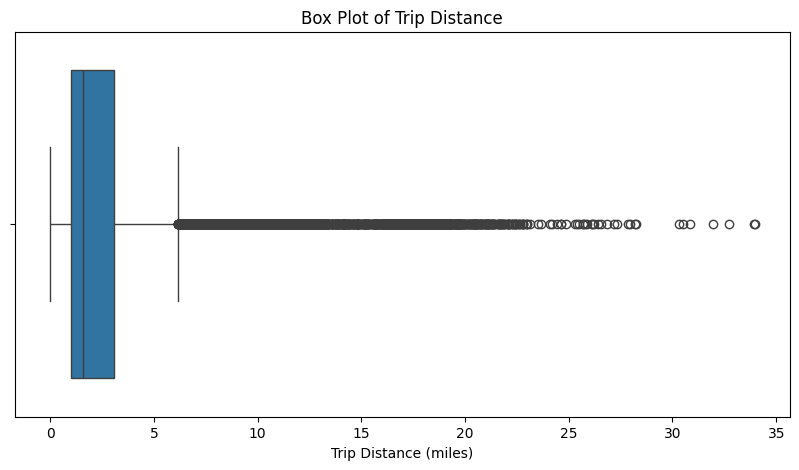

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

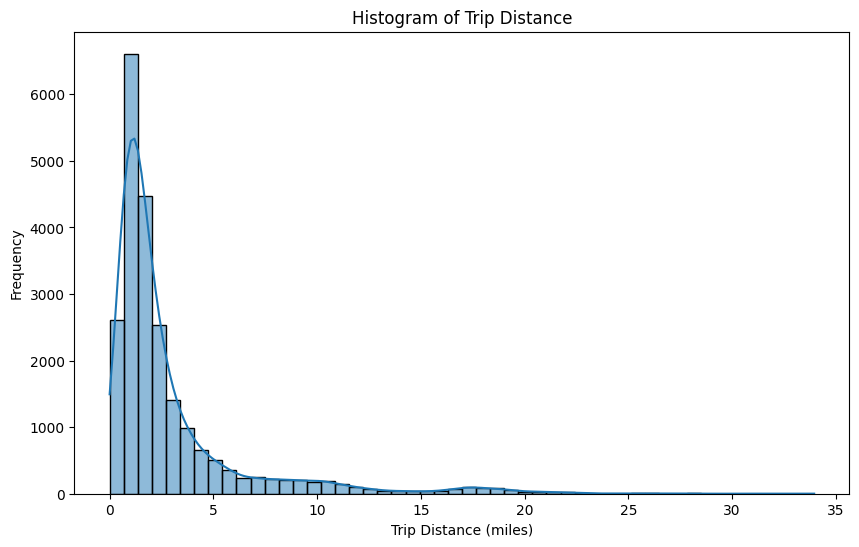

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

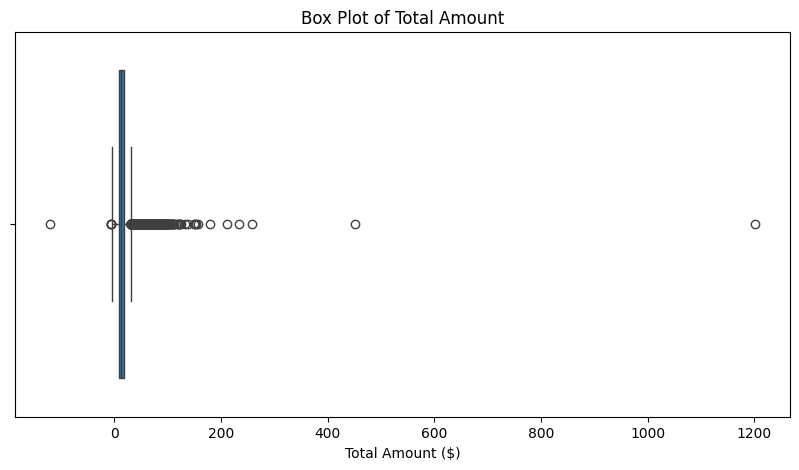

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['total_amount'])
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount ($)')
plt.show()

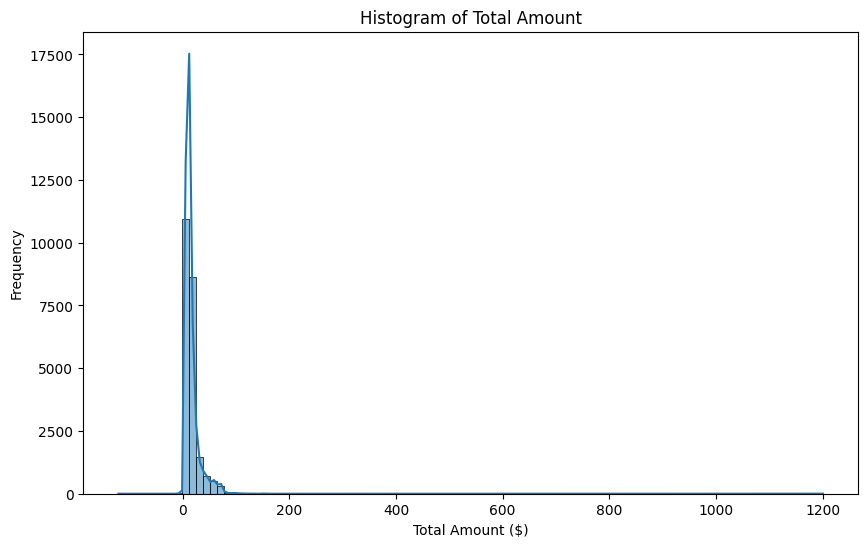

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=100, kde=True)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()

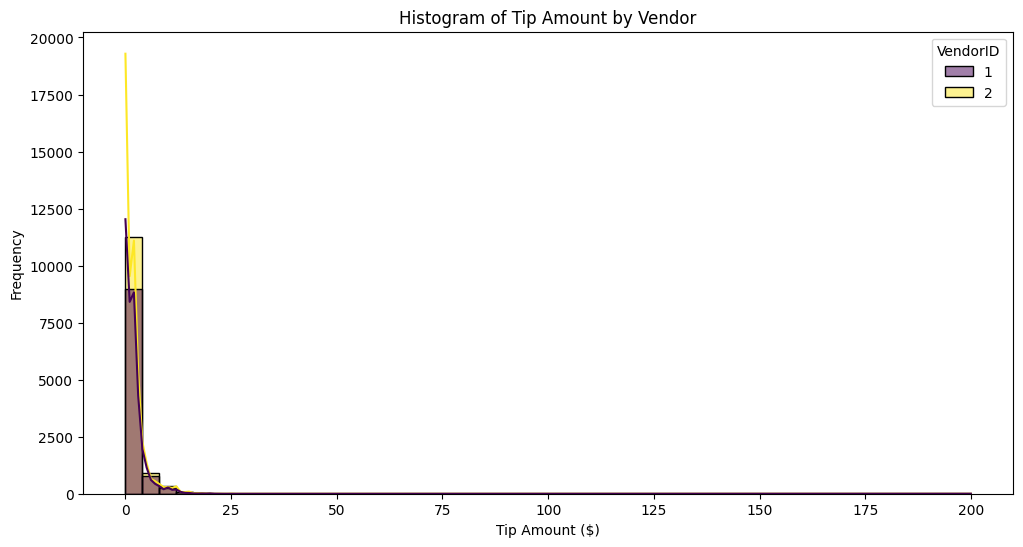

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tip_amount', hue='VendorID', bins=50, kde=True, palette='viridis')
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [136]:
import pandas as pd
import numpy as np

total_passenger = np.sum(df['passenger_count'])
total_passenger

np.int64(37279)

In [137]:
passenger_unique = df['passenger_count'].unique()
passenger_unique

array([6, 1, 2, 4, 5, 3, 0])

In [138]:
# Calculate mean tips by passenger_count

mean_tips_gruops = df.groupby('passenger_count')['tip_amount'].mean()
mean_tips_gruops

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


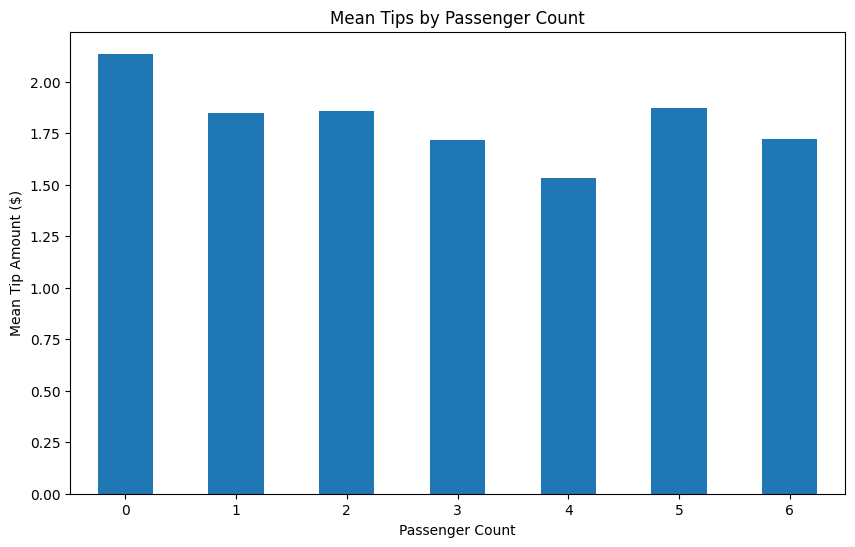

In [141]:
# Create bar plot for mean tips by passenger count

mean_tips_gruops.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Tips by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount ($)')
plt.xticks(rotation=0)
plt.show()

In [158]:
df.head(10)

,orderID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,pickup date,pickup time,dropoff time,trip duration,Month,Day,Year
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,25-Mar-2017,08:55:43,09:09:47,14.0,Mar,Sat,2017
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,...,0.0,0.3,20.80,11-Apr-2017,14:53:00,15:19:00,26.0,Apr,Tue,2017
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,15-Dec-2017,07:26:56,07:34:08,7.0,Dec,Fri,2017
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,...,0.0,0.3,27.69,07-May-2017,13:17:00,13:48:00,31.0,May,Sun,2017
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,15-Apr-2017,23:32:20,23:49:03,17.0,Apr,Sat,2017
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.0,0.3,12.36,25-Mar-2017,20:34:11,20:42:11,8.0,Mar,Sat,2017
6,37660487,2,2017-05-03 19:04:00,2017-05-03 20:03:00,1,12.83,1,N,79,241,...,0.0,0.3,59.16,03-May-2017,19:04:00,20:03:00,59.0,May,Wed,2017
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.0,0.3,19.58,15-Aug-2017,17:41:06,18:03:05,22.0,Aug,Tue,2017
8,8433159,2,2017-02-04 16:17:00,2017-02-04 16:29:00,1,1.20,1,N,234,249,...,0.0,0.3,9.80,04-Feb-2017,16:17:00,16:29:00,12.0,Feb,Sat,2017
9,95294817,1,2017-11-10 15:20:00,2017-11-10 15:40:00,1,1.60,1,N,239,237,...,0.0,0.3,16.55,10-Nov-2017,15:20:00,15:40:00,20.0,Nov,Fri,2017


In [157]:
df['Month'] = df['tpep_pickup_datetime'].dt.strftime('%b')
df['Day'] = df['tpep_pickup_datetime'].dt.strftime('%a')
df['Year'] = df['tpep_pickup_datetime'].dt.strftime('%Y')


In [169]:
# Get total number of rides for each month
rides_by_month = df.groupby('Month').size()

# Reorder the monthly ride list so months go in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rides_by_month = rides_by_month.reindex(month_order)

display(rides_by_month)

,0
Month,
Jan,1997
Feb,1769
Mar,2049
Apr,2019
May,2013
Jun,1964
Jul,1697
Aug,1724
Sep,1734


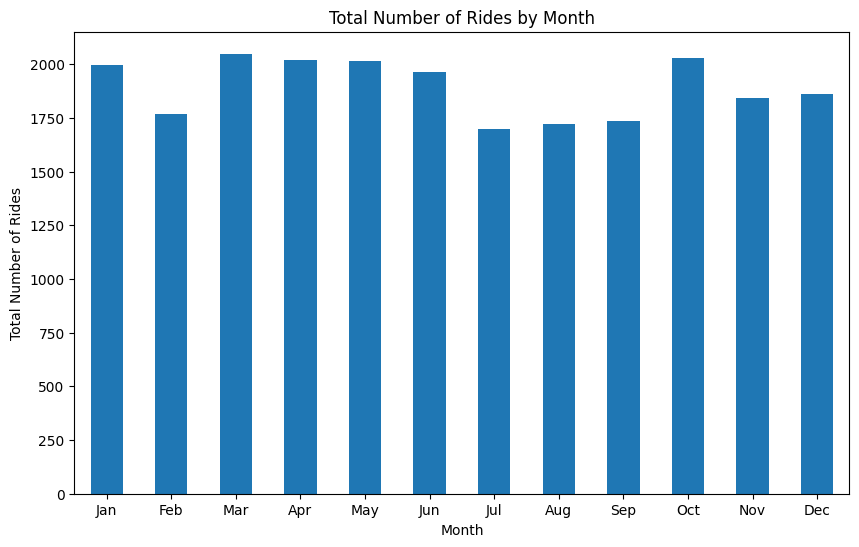

In [170]:
# plot total number of rides for each month

rides_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Rides')
plt.xticks(rotation=0)
plt.show()

In [171]:
# Get total number of passenger for each month
total_passenger_by_month = df.groupby('Month')['passenger_count'].sum()

# Reorder the monthly ride list so months go in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
total_passenger_by_month = total_passenger_by_month.reindex(month_order)

total_passenger_by_month

,passenger_count
Month,
Jan,3332
Feb,2911
Mar,3316
Apr,3233
May,3308
Jun,3270
Jul,2896
Aug,2897
Sep,2818


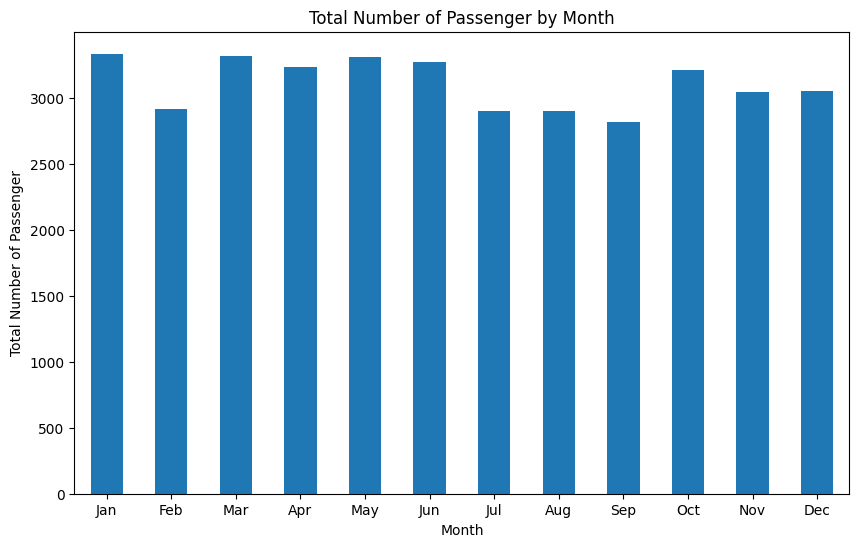

In [172]:
# plot total number of passenger for each month
total_passenger_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Passenger by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Passenger')
plt.xticks(rotation=0)
plt.show()

In [173]:
# Get total number of rides for each Day
rides_by_day = df.groupby('Day').size()

# Reorder the monthly ride list so months go in order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
rides_by_day = rides_by_day.reindex(day_order)

display(rides_by_day)


,0
Day,
Mon,2931
Tue,3198
Wed,3390
Thu,3402
Fri,3413
Sat,3367
Sun,2998


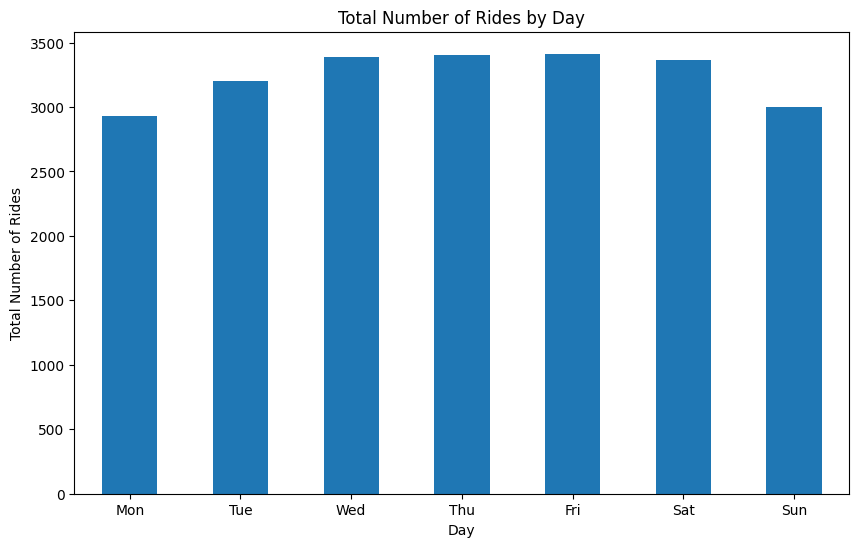

In [174]:
# plot total number of passenger for each Day
rides_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Rides by Day')
plt.xlabel('Day')
plt.ylabel('Total Number of Rides')
plt.xticks(rotation=0)
plt.show()

In [175]:
# total revenue by day of the week
total_revenue_by_day = df.groupby('Day')['total_amount'].sum()

# Reorder the daily ride list so months go in order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
total_revenue_by_day = total_revenue_by_day.reindex(day_order)

total_revenue_by_day

,total_amount
Day,
Mon,49574.37
Tue,52527.14
Wed,55310.47
Thu,57181.91
Fri,55818.74
Sat,51195.40
Sun,48624.06


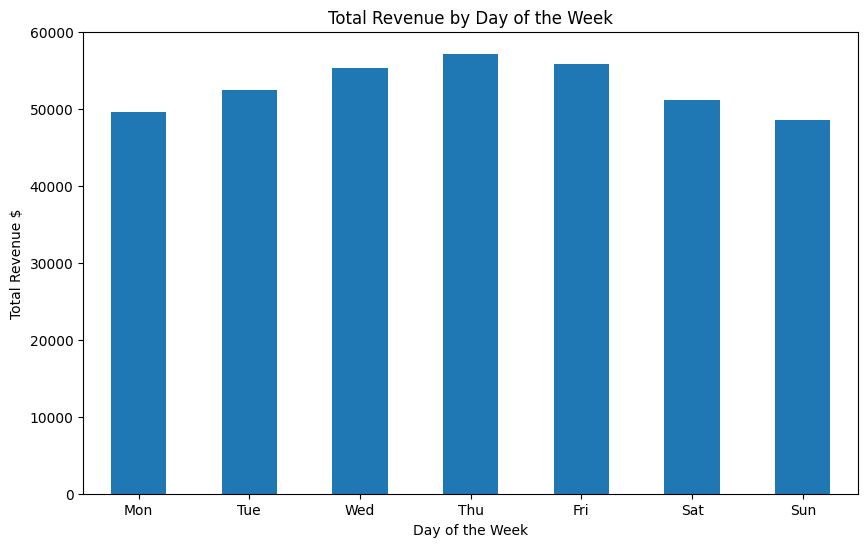

In [177]:
# plot total revenue by day of the week
total_revenue_by_day.plot(kind='bar', figsize=(10,6))
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue $')
plt.xticks(rotation=0)
plt.show()

In [178]:
# total revenue by month
total_revenue_by_month = df.groupby('Month')['total_amount'].sum()

# Reorder the monthly ride list so months go in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec']
total_revenue_by_month = total_revenue_by_month.reindex(month_order)

total_revenue_by_month

,total_amount
Month,
Jan,31735.25
Feb,28937.89
Mar,33085.89
Apr,32012.54
May,33828.58
Jun,32920.52
Jul,26617.64
Aug,27759.56
Sep,28206.38


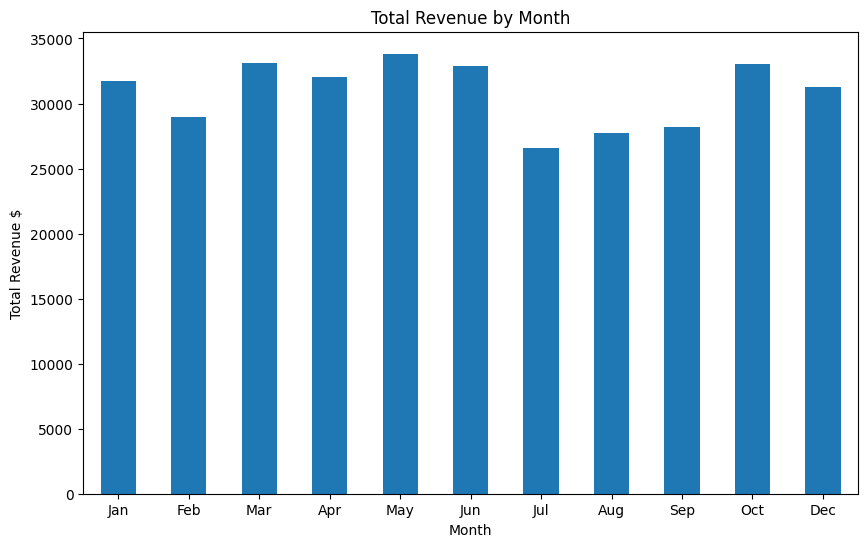

In [179]:
# plot total revenue by month
total_revenue_by_month.plot(kind='bar', figsize=(10,6))
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue $')
plt.xticks(rotation=0)
plt.show()

In [188]:
# Get number of unique drop-off location IDs
unique_dropoff_ids = pd.Series(df['DOLocationID'].unique()).size

# Display the unique drop-off location IDs
unique_dropoff_ids

216

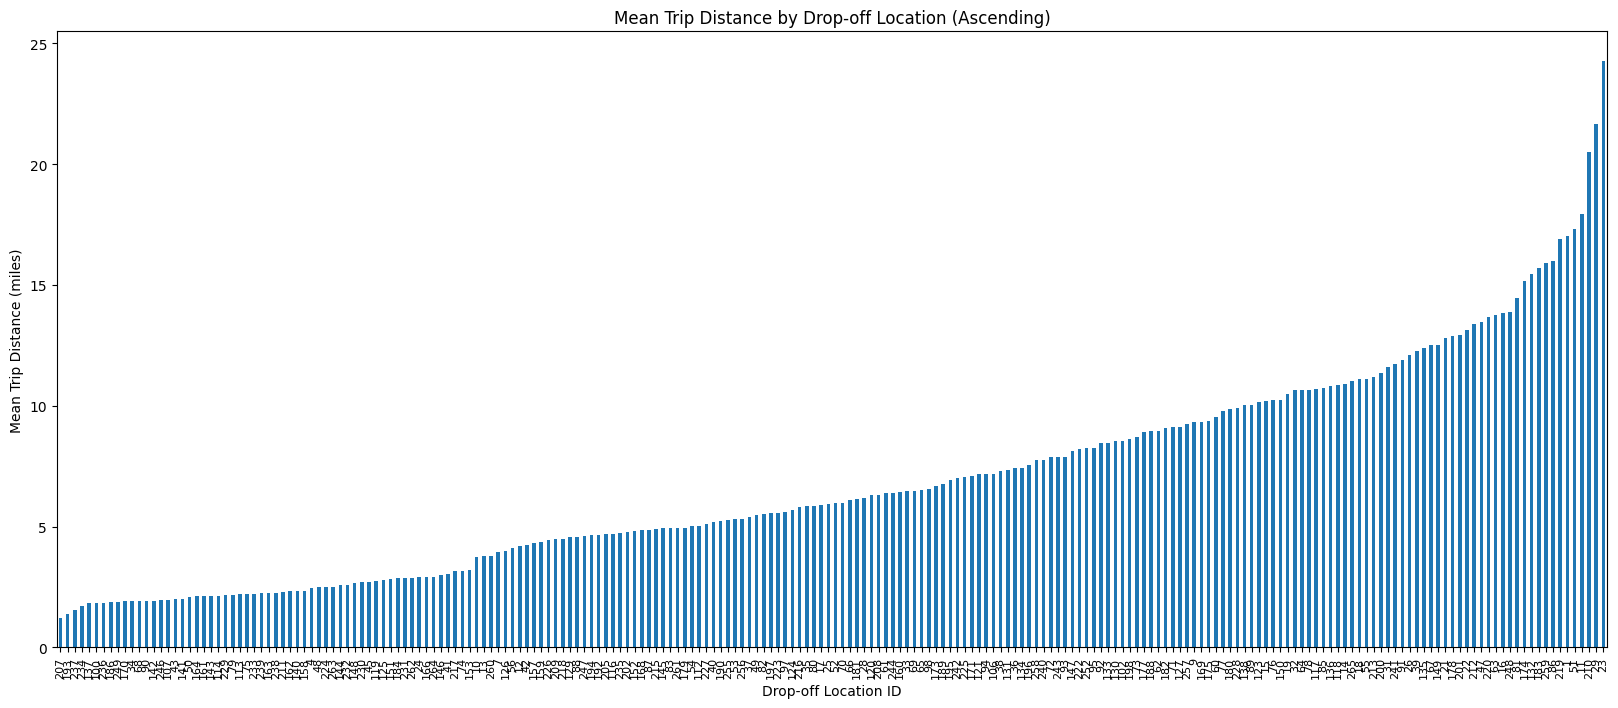

In [202]:
# Sort mean trip distances in ascending order
mean_trip_distance_ascending = mean_trip_distance_by_dropoff.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(20, 8))
mean_trip_distance_ascending.plot(kind='bar')
plt.title('Mean Trip Distance by Drop-off Location (Ascending)')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Mean Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

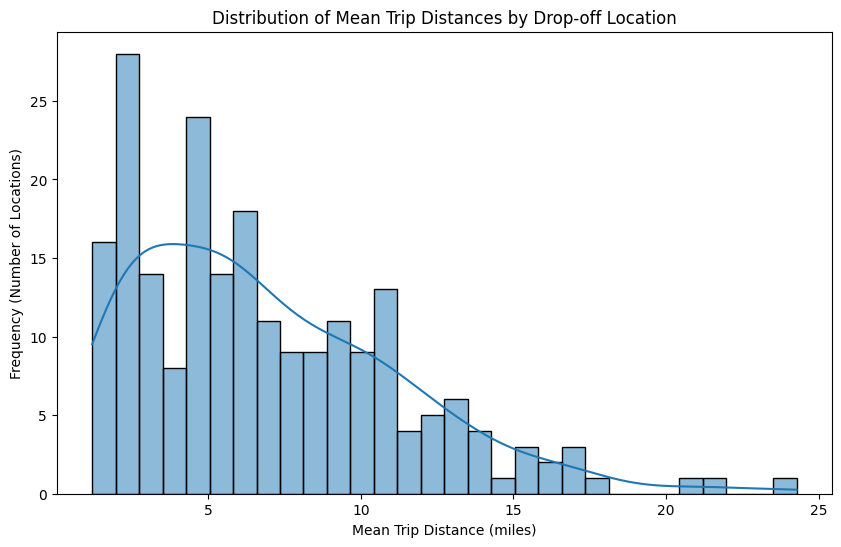

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(mean_trip_distance_by_dropoff, bins=30, kde=True)
plt.title('Distribution of Mean Trip Distances by Drop-off Location')
plt.xlabel('Mean Trip Distance (miles)')
plt.ylabel('Frequency (Number of Locations)')
plt.show()

# Task
Simulate 1,500 start points and a set of unique endpoints using a normal distribution with a mean of 10 and a standard deviation of 5, calculate the Euclidean distance for each pair, determine the mean distance per unique endpoint, and visualize the results using a bar plot.

## Simulate Coordinate Data

### Subtask:
Generate 1,500 start points and a set of unique endpoints using a normal distribution.


**Reasoning**:
I will generate the simulated coordinate data by following the provided instructions, which include generating start and end points from a normal distribution and combining them into a pandas DataFrame.



In [200]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate 1,500 start points (x and y coordinates)
n_starts = 1500
mean, std = 10, 5
start_x = np.random.normal(mean, std, n_starts)
start_y = np.random.normal(mean, std, n_starts)

# 2. Define 10 unique endpoints with IDs
n_endpoints = 10
endpoint_ids = np.arange(1, n_endpoints + 1)
end_x_coords = np.random.normal(mean, std, n_endpoints)
end_y_coords = np.random.normal(mean, std, n_endpoints)

# Store endpoints in a temporary lookup table/DataFrame
endpoints_lookup = pd.DataFrame({
    'endpoint_id': endpoint_ids,
    'end_x': end_x_coords,
    'end_y': end_y_coords
})

# 3. Randomly assign one of the 10 endpoints to each of the 1,500 start points
assigned_indices = np.random.choice(n_endpoints, size=n_starts)
assigned_endpoints = endpoints_lookup.iloc[assigned_indices].reset_index(drop=True)

# 4. Combine into a final DataFrame
simulated_coords_df = pd.DataFrame({
    'start_x': start_x,
    'start_y': start_y
})
simulated_coords_df = pd.concat([simulated_coords_df, assigned_endpoints], axis=1)

# Display the first few rows
print(f'DataFrame shape: {simulated_coords_df.shape}')
simulated_coords_df.head()

DataFrame shape: (1500, 5)


,start_x,start_y,endpoint_id,end_x,end_y
0,12.483571,13.891805,8,2.263480,-4.160778
1,9.308678,7.244071,6,3.322592,15.191894
2,13.238443,5.909006,1,0.460962,9.531819
3,17.615149,9.983128,5,12.782766,7.082003
4,8.829233,9.149077,8,2.263480,-4.160778


## Calculate Euclidean Distance

### Subtask:
Calculate the Euclidean distance for each start-end point pair and add it to the DataFrame.

**Reasoning**:
I will calculate the Euclidean distance between `(start_x, start_y)` and `(end_x, end_y)` using the distance formula: $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$. This will be added as a new column to the `simulated_coords_df` DataFrame.

**Reasoning**:
Calculate the Euclidean distance for each start-end point pair using the formula and add it as a new column to the `simulated_coords_df` DataFrame.



In [201]:
# Calculate the Euclidean distance for each pair
simulated_coords_df['euclidean_distance'] = np.sqrt(
    (simulated_coords_df['end_x'] - simulated_coords_df['start_x'])**2 +
    (simulated_coords_df['end_y'] - simulated_coords_df['start_y'])**2
)

# Display the first few rows to verify the calculation
simulated_coords_df.head()

,start_x,start_y,endpoint_id,end_x,end_y,euclidean_distance
0,12.483571,13.891805,8,2.263480,-4.160778,20.744783
1,9.308678,7.244071,6,3.322592,15.191894,9.949931
2,13.238443,5.909006,1,0.460962,9.531819,13.281144
3,17.615149,9.983128,5,12.782766,7.082003,5.636351
4,8.829233,9.149077,8,2.263480,-4.160778,14.841204


In [205]:
from google.colab import files

# Save the cleaned taxi dataframe to an Excel file
# Note: This requires the 'openpyxl' library which is standard in Colab
file_name = 'cleaned_taxi_data.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Determine Mean Distance per Unique Endpoint

### Subtask:
Calculate the mean Euclidean distance for each of the 10 unique endpoints.

**Reasoning**:
I will group the `simulated_coords_df` by the `endpoint_id` and compute the average of the `euclidean_distance` column to see which endpoints are, on average, furthest from the start points.

**Reasoning**:
With the Euclidean distances calculated, I will now group the data by 'endpoint_id' and calculate the mean 'euclidean_distance' for each unique endpoint to satisfy the next part of the task.



In [203]:
# Calculate the mean Euclidean distance for each unique endpoint
mean_distance_per_endpoint = simulated_coords_df.groupby('endpoint_id')['euclidean_distance'].mean()

# Display the mean distances
print("Mean Euclidean Distance per Endpoint ID:")
print(mean_distance_per_endpoint)

Mean Euclidean Distance per Endpoint ID:
endpoint_id
1     10.894066
2      9.415301
3      8.972078
4     13.106162
5      7.402864
6     10.512901
7      9.682945
8     16.457957
9      7.735264
10     6.740854
Name: euclidean_distance, dtype: float64


## Visualize Mean Distances

### Subtask:
Create a bar plot to visualize the mean Euclidean distance for each unique endpoint ID.

**Reasoning**:
I will use a bar plot to display the calculated mean distances for each `endpoint_id`. This visualization will help identify which endpoints are, on average, located furthest or closest to the generated start points.

**Reasoning**:
I will create a bar plot using matplotlib to visualize the mean Euclidean distance for each unique endpoint ID, allowing for a clear comparison of how the average distance varies across different endpoints.



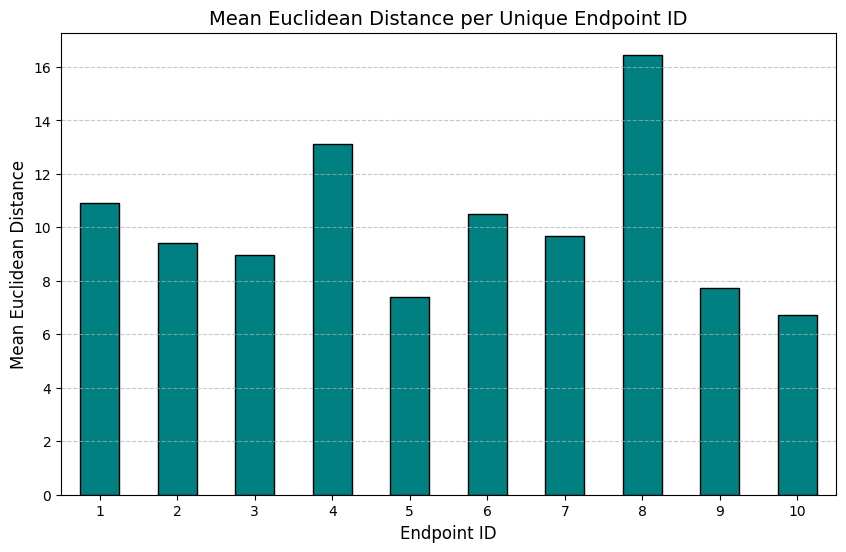

In [204]:
import matplotlib.pyplot as plt

# Create a bar plot for the mean Euclidean distances
plt.figure(figsize=(10, 6))
mean_distance_per_endpoint.plot(kind='bar', color='teal', edgecolor='black')

# Adding titles and labels
plt.title('Mean Euclidean Distance per Unique Endpoint ID', fontsize=14)
plt.xlabel('Endpoint ID', fontsize=12)
plt.ylabel('Mean Euclidean Distance', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Summary:

### Q&A
**What were the results of the distance calculations between the 1,500 start points and the 10 unique endpoints?**
The simulation showed that mean Euclidean distances varied notably across different endpoints. While start points were generated around a mean of 10, the specific locations of the 10 endpoints resulted in average distances ranging from a minimum of approximately 6.74 units to a maximum of approximately 16.46 units.

### Data Analysis Key Findings
*   **Dataset Composition:** The analysis successfully processed 1,500 coordinate pairs (start points) randomly assigned to 10 unique fixed endpoints.
*   **Distance Variation:** Despite start and end points being drawn from the same normal distribution ($\mu=10, \sigma=5$), the mean distance per endpoint was not uniform.
*   **Maximum and Minimum Proximity:**
    *   **Endpoint 8** recorded the highest mean Euclidean distance at approximately 16.46 units.
    *   **Endpoint 10** recorded the lowest mean Euclidean distance at approximately 6.74 units.
*   **Visualization Trends:** The bar plot illustrated a clear disparity in spatial centralities, showing that some endpoints were naturally more "central" to the cloud of 1,500 start points than others due to random sampling.

### Insights or Next Steps
*   The significant range in mean distances (approx. 10 units difference between the best and worst cases) suggests that the specific location of a fixed "hub" or endpoint drastically affects efficiency, even in a normally distributed environment.
*   A valuable next step would be to perform a cluster analysis or create a scatter plot overlaying start points and endpoints to visually identify why specific IDs, like Endpoint 10, achieved much lower mean distances.
